In [10]:
%matplotlib inline
# %matplotlib widget

In [2]:
import csv
import os
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [21]:
import os
import csv

# datadir = '/Users/dh/workspace/BDL/demapper/results/cme/mappers_cmev2.json/'
# stat_type = 'degrees_TRs'
# filter_by = 'NeuMapper'

# datadir = '/Users/dh/workspace/BDL/demapper/results/cme/mappers_cme.json/'
# stat_type = 'compute_degrees'
# filter_by = 'BDLMapper'

# datadir = '/Users/dh/workspace/BDL/demapper/results/cme/mappers_cmev3.json/'
# stat_type = 'degrees_TRs'
# filter_by = 'BDLMapper'

datadir = '/Users/dh/workspace/BDL/demapper/results/cme/mappers_cmev4.json/'
stat_type = 'degrees_TRs'
filter_by = 'NeuMapper'


stats_path = os.path.join(datadir, 'stats-Mappers.csv')
results_path = os.path.join(datadir, stat_type, 'combined-{}.csv'.format(stat_type))

stats = []
with open(stats_path) as f:
    for row in csv.DictReader(f):
        obj = {}
        for k,v in row.items():
            if k == 'Mapper':
                obj[k] = v
            else:
                obj[k] = float(v)
        stats.append(obj)
print('len(stats): ', len(stats))

results = []
with open(results_path) as f:
    for row in csv.DictReader(f):
        obj = {}
        for k,v in row.items():
            if k == 'Mapper':
                obj[k] = v
            else:
                obj[k] = float(v)
        results.append(obj)
print('len(results): ', len(results))

dfs = pd.DataFrame(data=stats)
dfr = pd.DataFrame(data=results)

df = dfr.join(dfs.set_index('Mapper'), on='Mapper')

df['K'] = df.apply(lambda x: int(x['Mapper'].split('_')[1]), axis=1)
df['R'] = df.apply(lambda x: int(x['Mapper'].split('_')[2]), axis=1)
df['G'] = df.apply(lambda x: int(x['Mapper'].split('_')[3]), axis=1)

cols = df.columns.tolist()
main_cols = cols[:1] + cols[-3:]
other_cols = [c for c in cols if c not in main_cols]
df = df[main_cols + other_cols]

if filter_by:
    df = df[df['Mapper'].str.startswith(filter_by)]

len(stats):  539
len(results):  539


In [4]:
df.head()

,Mapper,K,R,G,ChangePointsIndicesError,ChangePointsResiduals,assortativity-mean,assortativity-std,coverage_nodes-mean,coverage_nodes-std,degree_TRs_avg-mean,degree_TRs_avg-std,degree_TRs_entropy-mean,degree_TRs_entropy-std,distances_entropy-mean,distances_entropy-std,distances_max-mean,distances_max-std,hrfdur_stat-mean,hrfdur_stat-std
0,NeuMapper_12_100_26,12,100,26,9.285714,0.013176,0.042601,0.122126,0.956136,0.051652,44.649733,10.021177,6.433677,0.356536,2.416817,0.369060,9.944444,3.076901,0.494021,0.093266
1,NeuMapper_12_100_30,12,100,30,55.428571,0.106069,0.050133,0.147454,0.983693,0.018738,124.868067,32.019277,7.670852,0.329029,2.041132,0.389765,7.222222,2.129776,0.627246,0.106665
2,NeuMapper_12_100_34,12,100,34,55.428571,0.122081,0.030838,0.120939,0.987901,0.014921,275.252278,70.560323,8.488682,0.259681,1.778874,0.285992,5.500000,1.339447,0.725849,0.111976
3,NeuMapper_12_100_38,12,100,38,54.000000,0.130420,0.013041,0.084552,0.992292,0.010715,520.488556,127.002332,8.955531,0.209182,1.586333,0.250512,4.666667,1.137593,0.808526,0.085166
4,NeuMapper_12_100_42,12,100,42,53.714286,0.138524,-0.033789,0.037597,0.993584,0.009951,863.172000,207.742270,9.236778,0.182853,1.411156,0.242564,4.055556,0.937595,0.879753,0.071324


### Plot all parameters

In [22]:
# df.pivot('R', 'G', 'ChangePointsIndicesError')
# df.pivot(index='R', columns='G', values='ChangePointsIndicesError')
from matplotlib.colors import LogNorm, Normalize

df['ChangePointsIndicesErrorRev'] = df.apply(lambda x: 1.0 / x['ChangePointsIndicesError'], axis=1)
df['ChangePointsResidualsRev'] = df.apply(lambda x: 1.0 / x['ChangePointsResiduals'], axis=1)

target_metrics = ['ChangePointsIndicesError', 'ChangePointsResiduals',
                  'ChangePointsIndicesErrorRev', 'ChangePointsResidualsRev', 'coverage_nodes-mean', 'coverage_nodes-std',
                  'hrfdur_stat-mean', 'hrfdur_stat-std']
log_metrics = ['ChangePointsIndicesErrorRev', 'ChangePointsResidualsRev']


# target = 'ChangePointsIndicesErrorRev'
fixedV, indexV, colV = 'G', 'K', 'R'
fixedV, indexV, colV = 'K', 'R', 'G'
fixedV, indexV, colV = 'R', 'K', 'G' # Most informative

for target in target_metrics:
    vmin, vmax = min(df[target]), max(df[target])

    fixed_vals = sorted(list(set(df[fixedV].to_list())))
    f, axr = plt.subplots(1, len(fixed_vals), figsize=(4 * len(fixed_vals), 4))
    for K,ax in zip(fixed_vals,axr):
        df_p = df[df[fixedV] == K].pivot(index=indexV, columns=colV, values=target)

        ax = sns.heatmap(df_p, vmin=vmin, vmax=vmax, ax=ax)
        ax.set_title('{} == {}'.format(fixedV, K))

    # plt.title('{} == {}'.format(fixedV, K))
    plt.tight_layout()
    plt.savefig(os.path.join(datadir,'plot_{}.png'.format(target)))
    plt.close()

### Plot limits

In [20]:
from matplotlib.colors import LogNorm, Normalize

sns.set(rc={'figure.facecolor':'white'})

target_metrics = {
    'ChangePointsIndicesError': [0, 12],
    'coverage_nodes-mean': [0.7, 1.0],
    'hrfdur_stat-mean': [0.15, 0.50]
}

fixedV, indexV, colV = 'R', 'K', 'G' # Most informative

fixed_vals = sorted(list(set(df[fixedV].to_list())))
f, axr = plt.subplots(len(target_metrics)+1, len(fixed_vals), figsize=(4 * len(fixed_vals), 4 * len(target_metrics) + 4))

for axc, (target, lims) in zip(axr, target_metrics.items()):
    for K,ax in zip(fixed_vals,axc):
        df_p = df[df[fixedV] == K].pivot(index=indexV, columns=colV, values=target)
        df_wl = (df_p >= lims[0]) & (df_p <= lims[1]) # within limits

        ax = sns.heatmap(df_wl, vmin=0.0, vmax=1.0, ax=ax)
        ax.set_title('{} == {}'.format(fixedV, K))

# plot the combined plot
axc = axr[len(target_metrics)]

for K,ax in zip(fixed_vals,axc):
    comb_isset = False
    df_comb = None
    for target, lims in target_metrics.items():
        df_p = df[df[fixedV] == K].pivot(index=indexV, columns=colV, values=target)
        df_wl = (df_p >= lims[0]) & (df_p <= lims[1]) # within limits
        if not comb_isset:
            df_comb = df_wl
            comb_isset = True
        else:
            df_comb = df_comb & df_wl
            
    ax = sns.heatmap(df_comb, vmin=0.0, vmax=1.0, ax=ax)
    ax.set_title('{} == {}'.format(fixedV, K))


plt.tight_layout()
plt.savefig(os.path.join(datadir,'plot_limits.png'.format(target)))
plt.close()

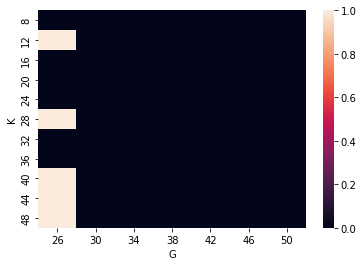

In [ ]:
df_p = df[df['R'] == 100].pivot(index='K', columns='G', values='ChangePointsIndicesError')
df_wl = (df_p < 12) & (df_p > 0) # within limits
sns.heatmap(df_wl)
plt.show()
plt.close()

In [85]:
df

,Mapper,K,R,G,ChangePointsIndicesError,ChangePointsResiduals,assortativity-mean,assortativity-std,coverage_nodes-mean,coverage_nodes-std,...,degree_TRs_entropy-mean,degree_TRs_entropy-std,distances_entropy-mean,distances_entropy-std,distances_max-mean,distances_max-std,hrfdur_stat-mean,hrfdur_stat-std,ChangePointsIndicesErrorRev,ChangePointsResidualsRev
0,NeuMapper_12_100_26,12,100,26,9.285714,0.013176,0.042601,0.122126,0.956136,0.051652,...,6.433677,0.356536,2.416817,0.369060,9.944444,3.076901,0.494021,0.093266,0.107692,75.894836
1,NeuMapper_12_100_30,12,100,30,55.428571,0.106069,0.050133,0.147454,0.983693,0.018738,...,7.670852,0.329029,2.041132,0.389765,7.222222,2.129776,0.627246,0.106665,0.018041,9.427864
2,NeuMapper_12_100_34,12,100,34,55.428571,0.122081,0.030838,0.120939,0.987901,0.014921,...,8.488682,0.259681,1.778874,0.285992,5.500000,1.339447,0.725849,0.111976,0.018041,8.191274
3,NeuMapper_12_100_38,12,100,38,54.000000,0.130420,0.013041,0.084552,0.992292,0.010715,...,8.955531,0.209182,1.586333,0.250512,4.666667,1.137593,0.808526,0.085166,0.018519,7.667562
4,NeuMapper_12_100_42,12,100,42,53.714286,0.138524,-0.033789,0.037597,0.993584,0.009951,...,9.236778,0.182853,1.411156,0.242564,4.055556,0.937595,0.879753,0.071324,0.018617,7.218985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,NeuMapper_8_340_34,8,340,34,10.857143,0.009731,0.171999,0.050147,0.416557,0.144561,...,3.915443,0.191751,4.776743,0.469461,43.111111,12.970051,0.022998,0.010960,0.092105,102.763639
535,NeuMapper_8_340_38,8,340,38,8.857143,0.008112,0.174556,0.062057,0.712405,0.151992,...,4.659642,0.303210,4.729607,0.731504,51.944444,22.753079,0.052433,0.022773,0.112903,123.267856
536,NeuMapper_8_340_42,8,340,42,10.857143,0.010750,0.163957,0.056344,0.916883,0.054619,...,5.466122,0.369630,4.380868,0.721474,46.555556,20.976800,0.097646,0.031464,0.092105,93.019396
537,NeuMapper_8_340_46,8,340,46,11.000000,0.012966,0.147644,0.061521,0.965593,0.040780,...,6.167182,0.407889,3.708754,0.616833,31.888889,14.066602,0.155743,0.032466,0.090909,77.124380


### Other plots (deprecated)

In [69]:


def create_plot(df, ax, hparam, target, title=None):
    labels = sorted(list(df[hparam].unique()))
    data = [df[df[hparam] == label][target] for label in labels]
    ax = sns.boxplot(data=data, ax=ax)
    ax = sns.swarmplot(data=data, color=".25", ax=ax, size=1.5)
    ax.set_xticklabels(labels, rotation=10)
    ax.set_xlabel(hparam)
    ax.set_ylabel(target)
    ax.set_title('Distribution of {} over {}'.format(target,hparam) if not title else title)
    ax.grid(alpha=0.4)
    return ax


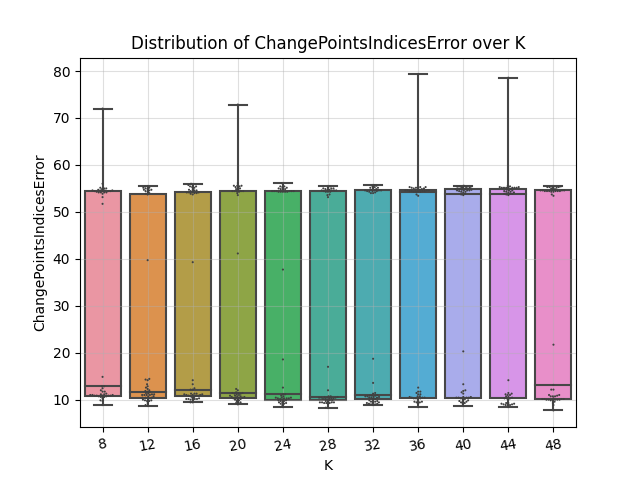

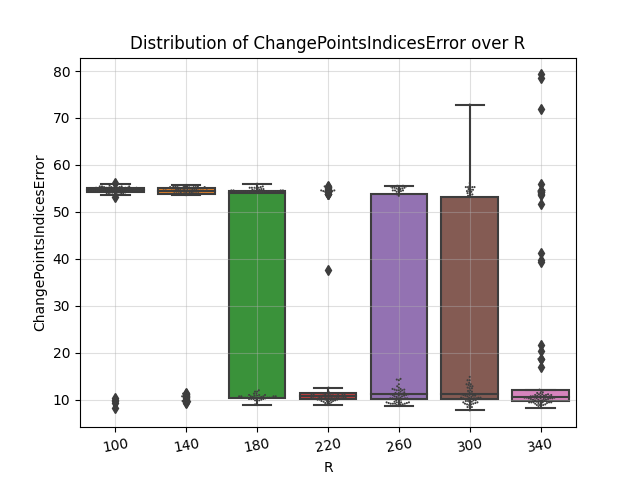

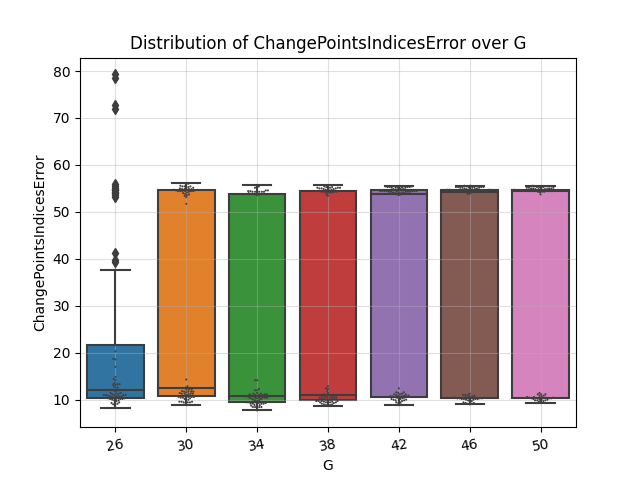

In [70]:

target = 'ChangePointsIndicesError'

plt.figure()
ax = create_plot(df, None, 'K', target)
plt.show()

plt.figure()
ax = create_plot(df, None, 'R', target)
plt.show()

plt.figure()
ax = create_plot(df, None, 'G', target)
plt.show()

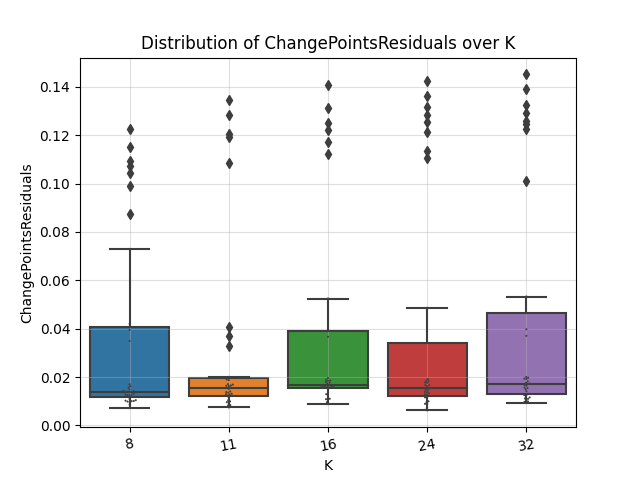

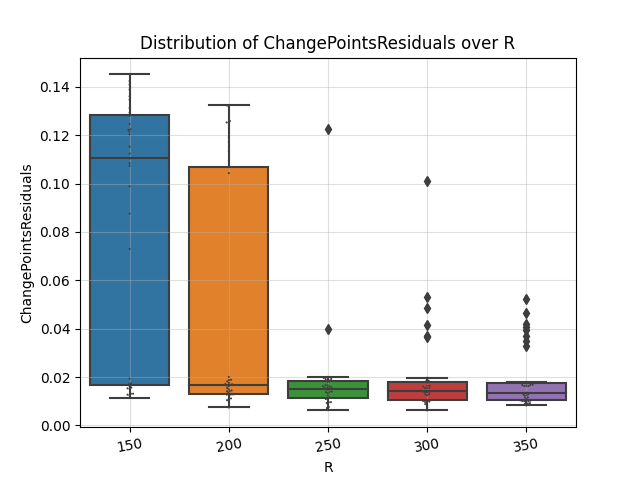

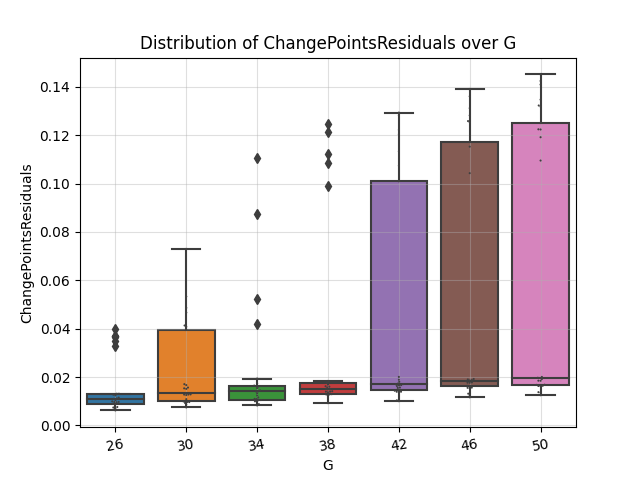

In [13]:

target = 'ChangePointsResiduals'
plt.figure()
ax = create_plot(df, None, 'K', target)
plt.show()

plt.figure()
ax = create_plot(df, None, 'R', target)
plt.show()

plt.figure()
ax = create_plot(df, None, 'G', target)
plt.show()

/var/folders/jl/fywysbss6b348fk_ncy9l7mr0000gn/T/ipykernel_82030/2105076379.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


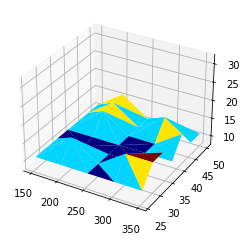

In [53]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['R'], df['G'], df['K'], cmap=plt.cm.jet, linewidth=0.01)
plt.show()

# Plot of indices error

In [40]:
df

,Mapper,K,R,G,ChangePointsIndicesError,ChangePointsResiduals,assortativity-mean,assortativity-std,coverage_nodes-mean,coverage_nodes-std,...,degree_TRs_avg-std,degree_TRs_entropy-mean,degree_TRs_entropy-std,distances_entropy-mean,distances_entropy-std,distances_max-mean,distances_max-std,hrfdur_stat-mean,hrfdur_stat-std,ChangePointsIndicesErrorRev
0,NeuMapper_11_150_26,11,150,26,11.857143,0.013098,0.038543,0.084045,0.862530,0.056776,...,6.042918,5.182045,0.455971,3.037974,0.423931,17.277778,6.424270,0.230863,0.051409,0.084337
1,NeuMapper_11_150_30,11,150,30,10.857143,0.015100,0.040766,0.103376,0.976011,0.023072,...,16.370136,6.656951,0.407400,2.705862,0.470848,15.722222,5.938960,0.374082,0.072195,0.092105
2,NeuMapper_11_150_34,11,150,34,10.142857,0.016249,0.062142,0.120260,0.986053,0.014088,...,32.455360,7.725219,0.307090,2.248653,0.355182,9.722222,3.005985,0.507475,0.085116,0.098592
3,NeuMapper_11_150_38,11,150,38,53.857143,0.108403,0.074153,0.129943,0.991315,0.011778,...,66.283431,8.448894,0.253485,1.916717,0.296436,6.666667,1.414214,0.610686,0.087846,0.018568
4,NeuMapper_11_150_42,11,150,42,53.857143,0.120343,0.096103,0.152792,0.992471,0.009808,...,119.985581,8.910702,0.206778,1.767277,0.299194,5.666667,1.328422,0.708813,0.110489,0.018568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,NeuMapper_8_350_34,8,350,34,52.428571,0.041988,0.164675,0.047091,0.360553,0.126282,...,0.434059,3.851913,0.147122,4.868766,0.392826,44.722222,11.508593,0.018577,0.008790,0.019074
171,NeuMapper_8_350_38,8,350,38,10.285714,0.010231,0.177442,0.057439,0.669444,0.137780,...,1.526397,4.552192,0.258951,4.734175,0.592431,49.555556,15.941888,0.042495,0.017614,0.097222
172,NeuMapper_8_350_42,8,350,42,10.714286,0.010024,0.173233,0.063105,0.897099,0.062628,...,5.057521,5.334658,0.342960,4.507753,0.749570,49.055556,23.002486,0.084409,0.029225,0.093333
173,NeuMapper_8_350_46,8,350,46,11.857143,0.013121,0.153633,0.061965,0.966957,0.028806,...,11.163488,6.063054,0.397796,3.854355,0.646859,34.111111,14.970123,0.139393,0.031287,0.084337


In [51]:
sorted(df[df['R'] == 300]['hrfdur_stat-mean'].tolist())

[0.006176,
 0.006256,
 0.007091,
 0.010141,
 0.010356,
 0.018732,
 0.021458,
 0.022045,
 0.022205,
 0.024567,
 0.040219,
 0.043083,
 0.044605,
 0.05009,
 0.058225,
 0.079006,
 0.082393,
 0.085401,
 0.095184,
 0.114833,
 0.136271,
 0.138482,
 0.144523,
 0.158454,
 0.180692,
 0.213391,
 0.214946,
 0.226254,
 0.226605,
 0.26101,
 0.292319,
 0.305247,
 0.307182,
 0.319132,
 0.343667]